# Assignment

### Soal
#### 1. Multivariate Linear Regression
   Train a multivariate linear regression model for this data and shows the result & evaluation.
   - Take dataset: train.csv from Link
   - One Hot Encoding, Fill NA
   - Separate into X_train, X_test, y_train, y_test (y = “SalePrice”) with proportion: 60-40
   - Train regression model with X_train and y_train
   - Evaluate the result with 3 metrics
   - Explain or Interpret the linear correlation between 3 features and the target (“SalePrice”) 

#### 2. Classification Models
   Train two models: logistic regression and random forest for this data and shows the result & 
   evaluation.
   - Take dataset: heart.csv from Link
   - One Hot Encoding
   - Separate into X_train, X_test, y_train, y_test (y = “HeartDisease”) with proportion: 60-40
   - Train two models with X_train and y_train (use Hyperparameter Tuning for random forest)
   - Evaluate the result with confusion matrix, classification report, and AUC
   - Which model is better at predicting Heart Disease? Interpret the reason.

# Answer

#### 1. Multivariate Linear Regression

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model, metrics
import matplotlib.pyplot as plt
import seaborn as sns

In [46]:
##Read the data
df=pd.read_csv("train.csv")

In [ ]:
df.head()

In [ ]:
##One Hot Encoding

In [ ]:
df.info()

In [ ]:
#Missing Value

In [47]:
#Columns with missing values in more than half number of rows
null_cols = [col for col in df.columns if df[col].isnull().sum() > 1640/2] 
null_cols

['Alley', 'PoolQC', 'Fence', 'MiscFeature']

In [48]:
#Drop the Column
#The dropped column is 'Alley', 'PoolQC', 'Fence', and 'MiscFeature'

df.drop(['Alley', 'PoolQC', 'Fence', 'MiscFeature'], axis = 'columns', inplace = True)

In [ ]:
df.info()

The 'Alley', 'PoolQC', 'Fence', and 'MiscFeature' columns are no longer present in our dataframe

In [49]:
#Fill missing values with Mean/Median and Mode
df_update = df.copy()

#Missing values numerical data
df_update['LotFrontage'] = df_update['LotFrontage'].fillna(df_update['LotFrontage'].median())
df_update['MasVnrArea'] = df_update['MasVnrArea'].fillna(df_update['MasVnrArea'].median())
df_update['GarageYrBlt'] = df_update['GarageYrBlt'].fillna(df_update['GarageYrBlt'].median())

#Missing values categorical data
df_update['MasVnrType'] = df_update['MasVnrType'].fillna(df_update['MasVnrType'].mode()[0])
df_update['BsmtQual'] = df_update['BsmtQual'].fillna(df_update['BsmtQual'].mode()[0])
df_update['BsmtCond'] = df_update['BsmtCond'].fillna(df_update['BsmtCond'].mode()[0])
df_update['BsmtExposure'] = df_update['BsmtExposure'].fillna(df_update['BsmtExposure'].mode()[0])
df_update['BsmtFinType1'] = df_update['BsmtFinType1'].fillna(df_update['BsmtFinType1'].mode()[0])
df_update['BsmtFinType2'] = df_update['BsmtFinType2'].fillna(df_update['BsmtFinType2'].mode()[0])
df_update['Electrical'] = df_update['Electrical'].fillna(df_update['Electrical'].mode()[0])
df_update['FireplaceQu'] = df_update['FireplaceQu'].fillna(df_update['FireplaceQu'].mode()[0])
df_update['GarageType'] = df_update['GarageType'].fillna(df_update['GarageType'].mode()[0])
df_update['GarageFinish'] = df_update['GarageFinish'].fillna(df_update['GarageFinish'].mode()[0])
df_update['GarageQual'] = df_update['GarageQual'].fillna(df_update['GarageQual'].mode()[0])
df_update['GarageCond'] = df_update['GarageCond'].fillna(df_update['GarageCond'].mode()[0])

In [50]:
df_update.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 77 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

It can be seen that there are no more missing values on df_update.info()

In [51]:
df = df_update

In [52]:
df = pd.get_dummies(df)
df.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,0,0,1,0,0,0,0,1,0
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,0,0,0,1,0,0,0,0,1,0
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,0,0,1,0,0,0,0,1,0
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,0,0,1,1,0,0,0,0,0
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,0,0,0,1,0,0,0,0,1,0


In [ ]:
##Separate into X_train, X_test, y_train, y_test (y = “SalePrice”) with proportion: 60-40

In [61]:
#defining feature matrix(X) and response vector(y)
X = df
y = df['SalePrice']

In [62]:
#splitting X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    random_state=100)

In [ ]:
##Train regression model with X_train and y_train

In [63]:
# create linear regression object
reg = linear_model.LinearRegression()
 
# train the model using the training sets
reg.fit(X_train, y_train)
 
# regression coefficients
print('Coefficients: ', reg.coef_)

# regression intercept
print('Intercept: ', reg.intercept_)

Coefficients:  [-2.06050187e-15 -7.57616192e-13  8.14903700e-14 -1.08593690e-15
 -3.56372905e-11 -1.76252181e-11 -1.01186962e-12 -1.82942420e-13
  2.73440125e-14  6.88490064e-15 -1.90487816e-14  1.82946640e-14
  5.64500703e-15 -2.03287907e-14  2.12710166e-14 -4.25456924e-14
 -4.20077655e-14  1.38804117e-11  8.61134579e-11 -1.36270193e-12
  4.11910247e-11  5.57138336e-12  8.89080246e-11 -1.58519364e-11
 -1.11207865e-11  2.48381369e-13 -6.53097137e-12 -8.98155758e-14
 -4.64570882e-14 -4.40082532e-15  4.80475433e-14 -1.29039723e-13
  1.72732709e-13 -2.10272291e-13  1.66586366e-14  5.14098107e-12
 -9.56734514e-13  1.00000000e+00  3.30237058e-11 -2.52603515e-11
 -1.18784652e-11 -6.63836645e-13  4.77894759e-12  3.11217234e-12
 -3.11217233e-12  2.47312178e-12  7.54868866e-12 -2.03457927e-11
  1.03239823e-11  1.13062524e-11  4.30339684e-12 -1.24690835e-11
 -3.14056560e-12 -4.13160169e-12  4.13160170e-12 -9.82760904e-12
 -4.43351063e-12  6.16722357e-12  1.39788926e-11 -5.88499669e-12
 -1.234528

In [ ]:
##Evaluate the result with 3 metrics

In [64]:
#For X_test Prediction or house price prediction (SalePrice)
y_pred = reg.predict(X_test)

In [65]:
# MAE
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_pred)

7.362338846132636e-11

In [66]:
# RMSE
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred, squared=False)

1.0079464620757719e-10

In [67]:
# R Squared
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

1.0

From the results of evalution of the model using 3 metrics, the results of MAE = 7.36 , RMSE = 1, and R Squared = 1 were obtained. If the smaller the MAE and RMSE metric values, the smaller the error value of our model predictions and if the higher the R Squared value, the better our model. From the evalution of the model, it is found that our error value is very small which indicates the better our model prediction is and the very large Squared R value indicates that the accuracy of our model's prediction is very good.

In [ ]:
##Explain or Interpret the linear correlation between 3 features and the target (“SalePrice”)

In [68]:
#To make multiple columns into a new dataFrame
df2 = df[['SalePrice', 'OverallQual', 'GrLivArea', 'GarageArea']]
df2.head()

,SalePrice,OverallQual,GrLivArea,GarageArea
0,208500,7,1710,548
1,181500,6,1262,460
2,223500,7,1786,608
3,140000,7,1717,642
4,250000,8,2198,836


<AxesSubplot: title={'center': 'SalePrice Correlation with 3 Features'}>

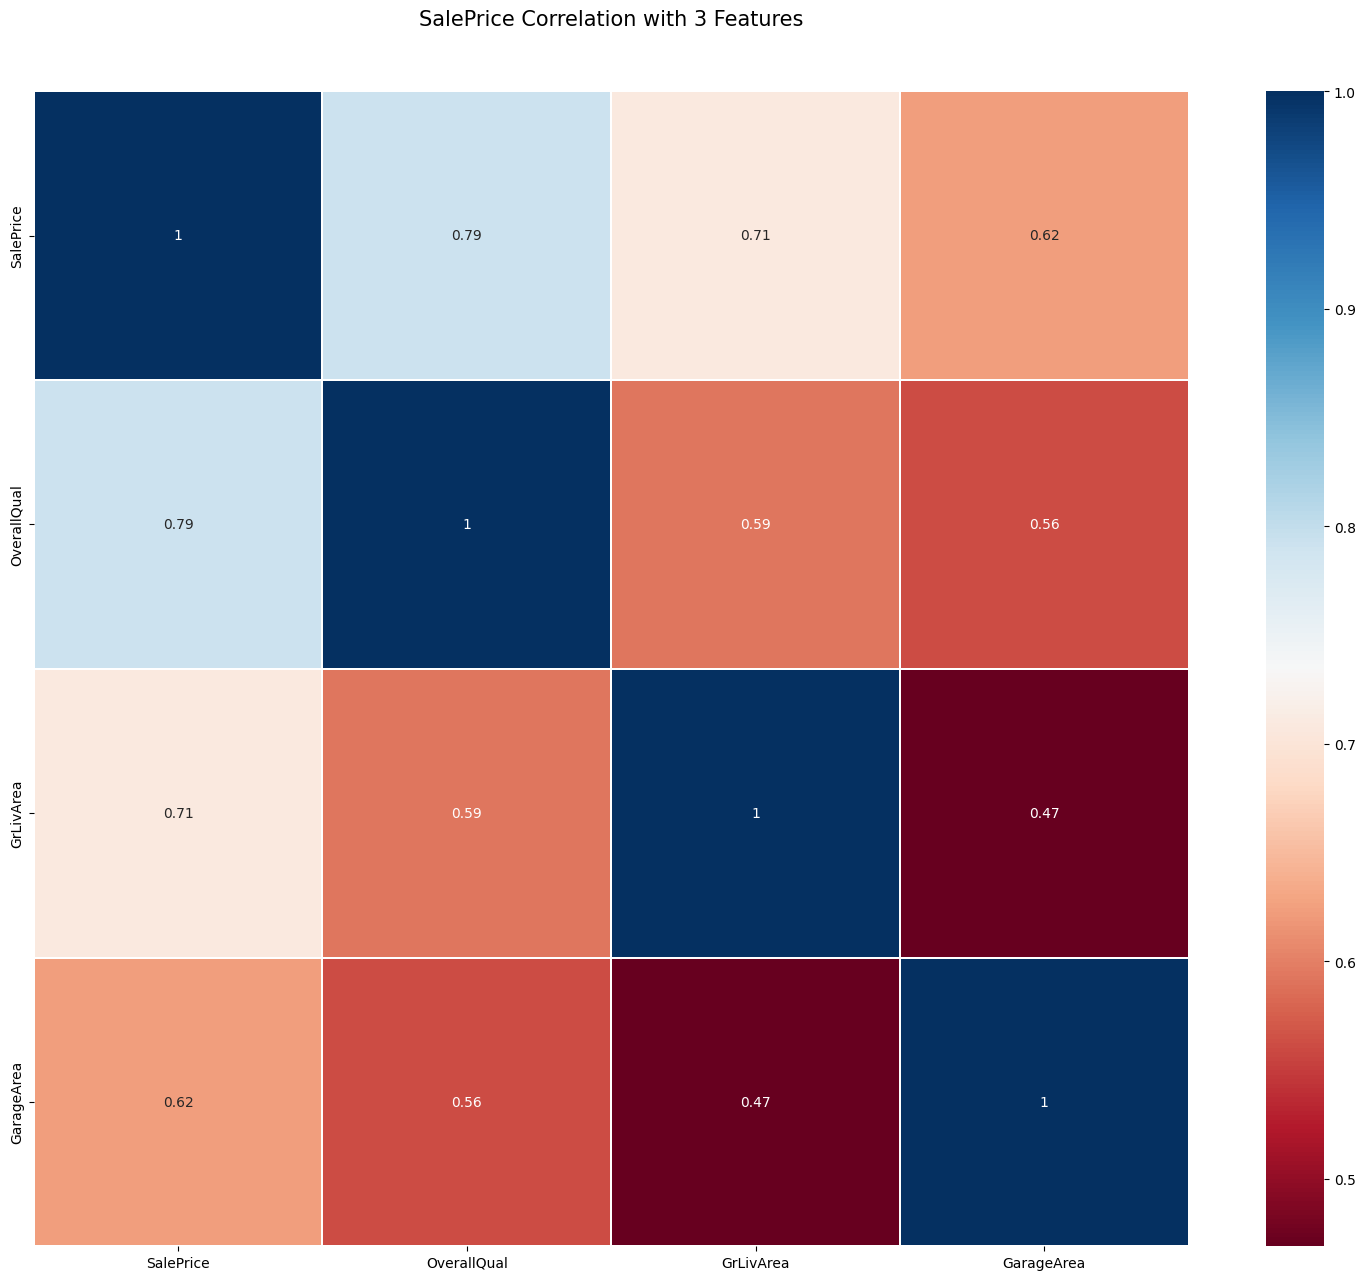

In [69]:
#Correlatian Heatmap
colormap = plt.cm.RdBu
plt.figure(figsize=(20,15))
plt.title('SalePrice Correlation with 3 Features', y=1.05, size=15)
sns.heatmap(df2.corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

It can be seen that the two variables that have a high correlation are 'SalePrice' and 'OverallQual'. This makes sense because, the better the quality of the materials used to build the property and the quality of the property, the higher the selling price of the property.

It can be seen that 'SalePrice' has a good correlation with 'GrLivArea' and 'GarageArea', this indicates that GrLivArea' and 'GarageArea' can affect the selling price of a property ('SalePrice').

#### 2. Classification Models

In [70]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model, metrics

In [71]:
#Read the data
df=pd.read_csv("heart.csv")
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [72]:
# Dataset columns
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [73]:
# Data column, type and null information, and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [74]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

As we can see on df.info() and df.isnull().sum() there is no missing value inside df.

In [75]:
# Check the proportion of 0 and 1 in HeartDisease label
df['HeartDisease'].value_counts()

1    508
0    410
Name: HeartDisease, dtype: int64

<AxesSubplot: xlabel='HeartDisease', ylabel='count'>

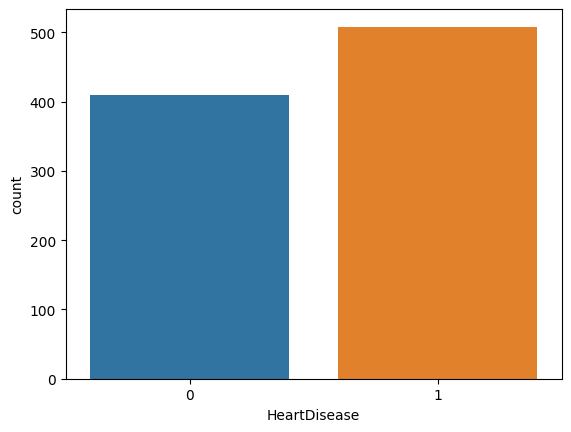

In [76]:
import seaborn as sns
sns.countplot(data = df, x='HeartDisease')

- Most of the people in our data are infected.
- Our target considered balanced target.

In [77]:
from sklearn.utils import resample

#create teo different dataframe of majority and minority class 
df_majority = df[(df['HeartDisease']== 1)] 
df_minority = df[(df['HeartDisease']== 0)] 

# upsample minority class
df_minority_upsampled = resample(df_minority,
                          replace=True,      # sample with replacement
                          n_samples=508,     # to match majority class
                          random_state=27)   # reproducible results

# combine majority and upsampled minority
df_upsampled = pd.concat([df_minority_upsampled, df_majority])

In [78]:
# check new class counts
df_upsampled['HeartDisease'].value_counts()

0    508
1    508
Name: HeartDisease, dtype: int64

Our targets have been balanced

C:\Users\User\AppData\Local\Temp\ipykernel_5880\1291683888.py:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),linewidths=0.1,vmax=1.0,


<AxesSubplot: title={'center': 'SalePrice Correlation with 3 Features'}>

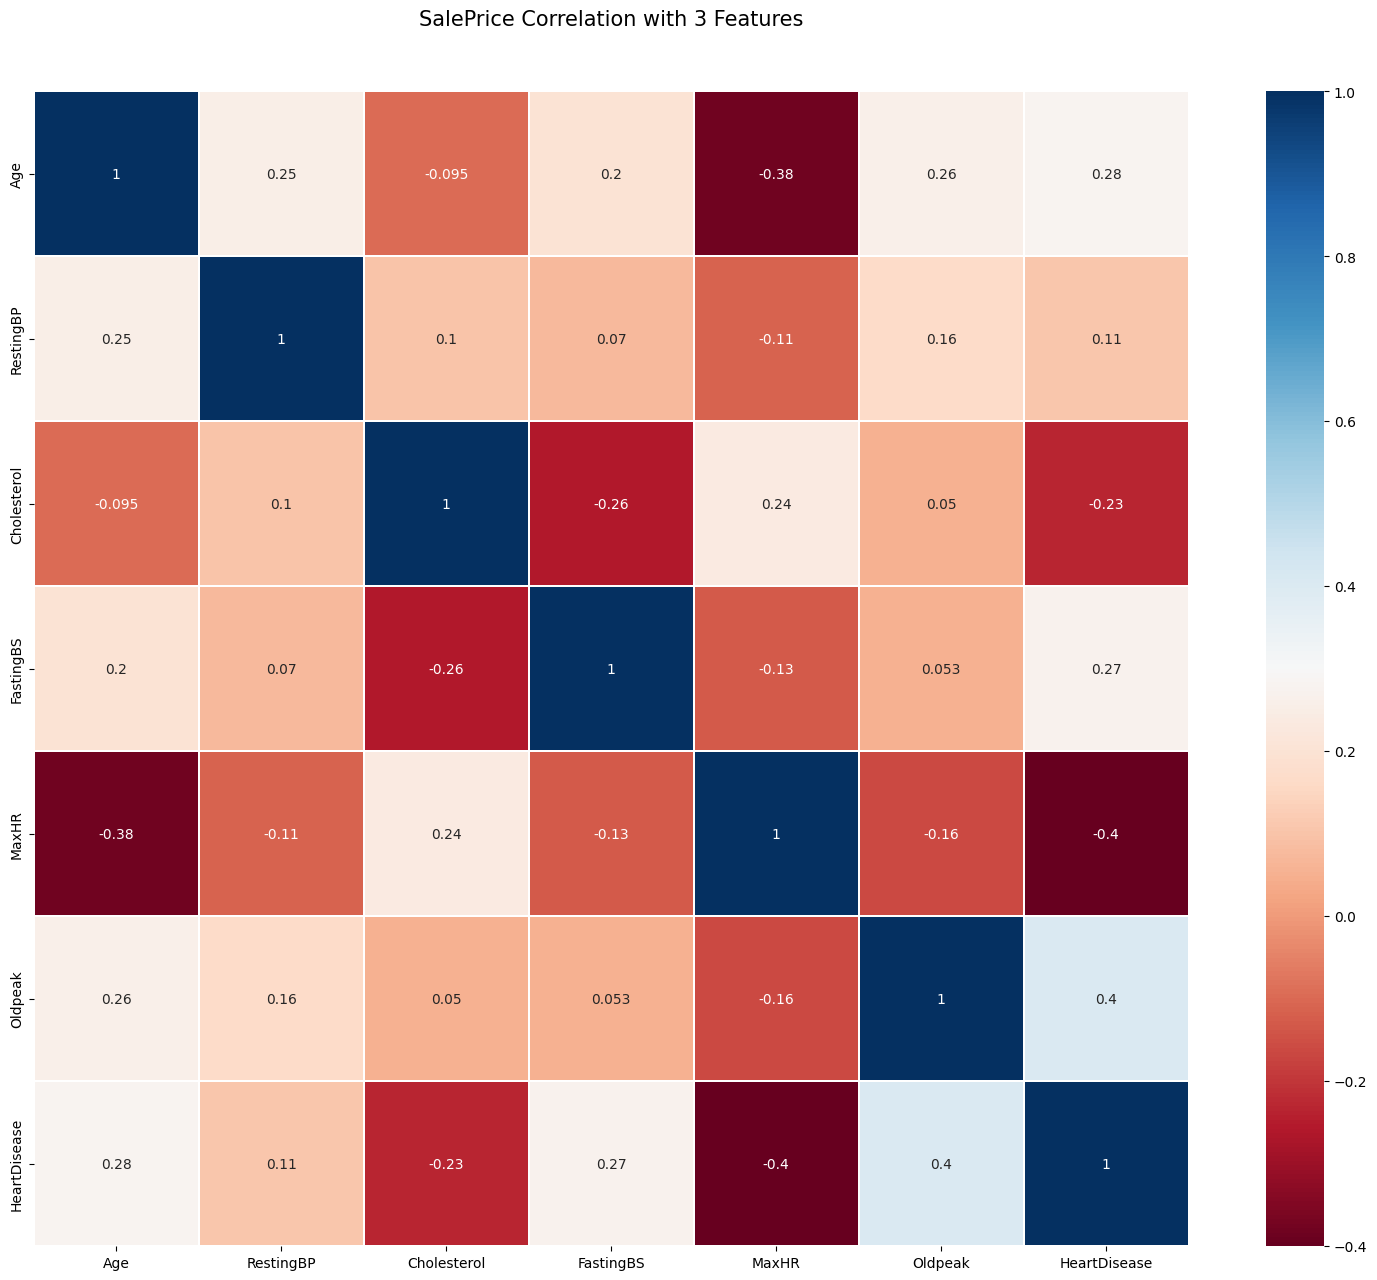

In [79]:
#Create a new dataFrame that contains features that correlate closely with 'HeartDisease'
#Correlatian Heatmap
colormap = plt.cm.RdBu
plt.figure(figsize=(20,15))
plt.title('SalePrice Correlation with 3 Features', y=1.05, size=15)
sns.heatmap(df.corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

We can see in Correlation_Heatmap that the 'MaxHR' and 'Cholesterol' features do not have a close correlation because coefficients close to 0 or < 0 are meaningless, so we don't need to use them. 

In [80]:
#To load a new DataFrame
df = df[['Age', 'Sex', 'ChestPainType', 'RestingBP', 'FastingBS', 'RestingECG',
         'Oldpeak', 'ST_Slope', 'HeartDisease']]

In [81]:
df.head()

,Age,Sex,ChestPainType,RestingBP,FastingBS,RestingECG,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,0,Normal,0.0,Up,0
1,49,F,NAP,160,0,Normal,1.0,Flat,1
2,37,M,ATA,130,0,ST,0.0,Up,0
3,48,F,ASY,138,0,Normal,1.5,Flat,1
4,54,M,NAP,150,0,Normal,0.0,Up,0


In [82]:
#One Hot Encoding
df = pd.get_dummies(df)
df.head()

,Age,RestingBP,FastingBS,Oldpeak,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,140,0,0.0,0,0,1,0,1,0,0,0,1,0,0,0,1
1,49,160,0,1.0,1,1,0,0,0,1,0,0,1,0,0,1,0
2,37,130,0,0.0,0,0,1,0,1,0,0,0,0,1,0,0,1
3,48,138,0,1.5,1,1,0,1,0,0,0,0,1,0,0,1,0
4,54,150,0,0.0,0,0,1,0,0,1,0,0,1,0,0,0,1


In [ ]:
df.info()

It can be seen in df.head() with the one hot encoding method can represent or make category type data as binary vectors with integer values, 0 and 1, where all elements will be worth 0 except for one element that is worth 1, that is, the element that has the value of that category.

In [83]:
# defining feature matrix(X) and response vector(y)
X = df.loc[:, df.columns != 'HeartDisease']
y = df['HeartDisease']

In [84]:
# splitting X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    random_state=50)

In [ ]:
##Train two models with X_train and y_train (use Hyperparameter Tuning for random forest)

In [ ]:
## Logistic Regression

In [85]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr = lr.fit(X_train, y_train)

C:\Users\User\.conda\envs\Zenius\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
## Decision Tree

In [86]:
from sklearn import tree
import pydotplus
import matplotlib.pyplot as plt
import matplotlib.image as pltimg

dtree = tree.DecisionTreeClassifier()
dtree = dtree.fit(X_train, y_train)

In [ ]:
text_representation = tree.export_text(dtree)
print(text_representation)

In [87]:
## Random Forest
from sklearn.ensemble import RandomForestClassifier

classifier_rf = RandomForestClassifier(random_state=50, n_jobs=-1, max_depth=5,
                                       n_estimators=100, oob_score=True)

classifier_rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, n_jobs=-1, oob_score=True, random_state=50)

In [88]:
## Hyperparameter Tuning for random forest

In [89]:
rf = RandomForestClassifier(random_state=50, n_jobs=-1)

In [90]:
#Create one variable (params) to deposit whatever we will try to do with the model
params = {
    'max_depth': [2,3,5,10,20],
    'min_samples_leaf': [5,10,20,50,100,200],
    'n_estimators': [10,25,30,50,100,200]
}

In [91]:
from sklearn.model_selection import GridSearchCV

# Instantiate the grid search model
grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 5,
                           n_jobs=-1, verbose=1, scoring="accuracy")

grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 180 candidates, totalling 900 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=-1, random_state=50),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 200],
                         'n_estimators': [10, 25, 30, 50, 100, 200]},
             scoring='accuracy', verbose=1)

From the hyperparameter tuning model for random forests, we can know that there is a Fitting 5 folds for each of 180 candidates, totalling 900 fits

In [92]:
# To see best_score
grid_search.best_score_

0.8567344961240309

We can see that the best_score or accuracy in the Hyperparameter Tuning model for random forests is 0.85 or 85%

In [95]:
# To see best_estimator (best_max_depth, best_min_samples_leaf)
rf_best = grid_search.best_estimator_
rf_best.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, min_samples_leaf=10, n_estimators=50,
                       n_jobs=-1, random_state=50)

We can see that the best_estimator or accuracy in the Hyperparameter Tuning model for random forests is located at max_depth=5 and min_samples_leaf=10

In [ ]:
##Evaluate the result with confusion matrix, classification report, and AUC

In [96]:
#For X_test predictions
y_lr = lr.predict(X_test)
y_dtree = dtree.predict(X_test)
y_rf_before = classifier_rf.predict(X_test)
y_rf_after = rf_best.predict(X_test)

In [97]:
#To display confusion_matrix results
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_lr))
print(confusion_matrix(y_test, y_dtree))
print(confusion_matrix(y_test, y_rf_before))
print(confusion_matrix(y_test, y_rf_after))

[[100  25]
 [ 20 131]]
[[ 99  26]
 [ 32 119]]
[[103  22]
 [ 17 134]]
[[102  23]
 [ 16 135]]


Evaluation of the results with confusion_matrix shows the comparison between true positive ('HeartDisease') with false positive (normal) and between true negative (normal) with false negative ('HeartDisease')

In [ ]:
##Evaluate the result with classification report

In [98]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_lr))
print(classification_report(y_test, y_dtree))
print(classification_report(y_test, y_rf_before))
print(classification_report(y_test, y_rf_after))

              precision    recall  f1-score   support

           0       0.83      0.80      0.82       125
           1       0.84      0.87      0.85       151

    accuracy                           0.84       276
   macro avg       0.84      0.83      0.83       276
weighted avg       0.84      0.84      0.84       276

              precision    recall  f1-score   support

           0       0.76      0.79      0.77       125
           1       0.82      0.79      0.80       151

    accuracy                           0.79       276
   macro avg       0.79      0.79      0.79       276
weighted avg       0.79      0.79      0.79       276

              precision    recall  f1-score   support

           0       0.86      0.82      0.84       125
           1       0.86      0.89      0.87       151

    accuracy                           0.86       276
   macro avg       0.86      0.86      0.86       276
weighted avg       0.86      0.86      0.86       276

              preci

The evalusation of results with classification_report shows a summary of several metrics so that we can see the precision, recall, f1-score, and accuracy values.

In [ ]:
##Evaluate the result with AUC

In [99]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_lr, pos_label=1) # pos_label: positive label
print(auc(fpr, tpr))
fpr, tpr, thresholds = roc_curve(y_test, y_dtree, pos_label=1) # pos_label: positive label
print(auc(fpr, tpr))
fpr, tpr, thresholds = roc_curve(y_test, y_rf_before, pos_label=1) # pos_label: positive label
print(auc(fpr, tpr))
fpr, tpr, thresholds = roc_curve(y_test, y_rf_after, pos_label=1) # pos_label: positive label
print(auc(fpr, tpr))

0.8337748344370861
0.7900397350993378
0.8557086092715233
0.8550198675496689


Evaluation of the results with auc explains that the higher the auc, the better the model is in distinguishing between patients with heart disease and no (normal) heart disease.

In [ ]:
## Which model is better at predicting Heart Disease? Interpret the reason.

A better model for predicting Heart Disease is 'Random Forest'

Reason:
After evalution to several models with 3 metrics (confusion matrix, classification report, and AUC), we can see that the prediction results with the 'Random Forest' model have the highest accuracy. In evaluating metrics with classification_report it can be seen that there are several combined metrics, to see how accurate our model is in predicting true positive and true negative heart disease (normal) then the matching metric is the 'recall' metric because the 'recall' metric shows the positive true rate of a model, the highest accuracy of the recall metric is in the prediction of the 'Random Forest' model of 86%. And in the evaluation with the AUC metric, it can be seen that the highest accuracy is in the prediction of the 'Random Forest' model of 85%, because the higher the AUC value, the better the model is in distinguishing between patients with heart disease and no heart disease (normal).